# QDA and LDA

In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


## QDA

## 20171026 QDA and LDA모형차이 for Iris_박사님정답 참조 

QDA(quadratic discriminant analysis)는 Y 클래스에 대한 독립 변수 X의 조건부 확률 분포가 다변수 가우시안 정규 분포(multivariate Gaussian normal distribution)이라는 가정을 한다.

$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$

이 분포들을 알고 있으면 독립 변수 X에 대한 Y 클래스의 조건부 확률 분포는 다음과 같이 베이즈 규칙으로부터 구할 수 있다.

$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$

가정: 독립변수 x가 다변수 가우시안 정규분포이므로 실제 x가 정규분포가 아니면 QDA 가 잘못된 값을 가지게 된다 x가 다변수 가우시안 정규분포를 따르고 함수에 넣으면 y = k값을가진다 

예를 들어 Y 가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 X 의 확률 변수가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

Y의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

In [2]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0],[0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

In [11]:
X1.shape

(100, 2)

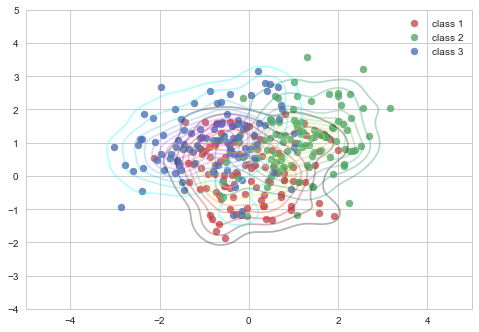

In [12]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()## 등고선으로 표시해줌 

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X, y)

예를 들어 Y 가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 X 의 확률 변수가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

Y의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

In [5]:
qda.means_ ## 위와같은식

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [7]:
qda.covariances_[0] ## y=1인 공분산행렬과 비슷

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [8]:
qda.covariances_[1]## y=2인 공분산행렬과 비슷

array([[ 0.66534246,  0.21132313],
       [ 0.21132313,  0.78806006]])

In [9]:
qda.covariances_[2]## y=3인 공분산행렬과 비슷

array([[ 0.9351386 ,  0.22880955],
       [ 0.22880955,  0.79142383]])

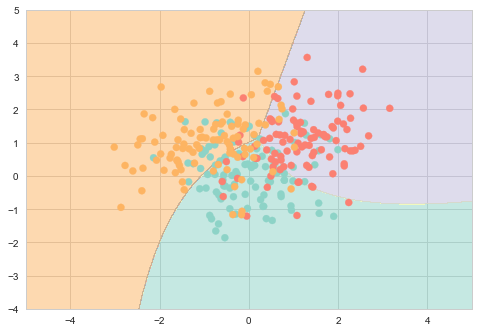

In [10]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)## 등고선으로 클래스를 분류  
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

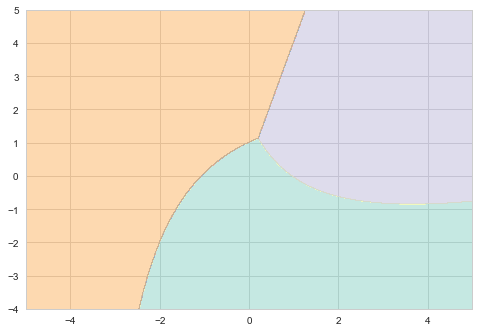

In [11]:
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5) ## 모수 0.5일때 

## LDA

LDA(linear discriminant analysis)에서는 각 Y 클래스에 대한 독립 변수 X의 조건부 확률 분포가 **공통된 공분산 행렬을 가지는** 다변수 가우시안 정규 분포(multivariate Gaussian normal distribution)이라고 가정한다. 즉

$$ \Sigma_k = \Sigma \;\;\; \text{ for all } k $$

이다.

이 때는 조건부 확률 분포를 다음과 같이 정리할 수 있다.

$$
\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}
$$


$$
\begin{eqnarray}
p(x \mid y = k) 
&=& C(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C(x)\exp(w_k^Tx + w_{k0})P(y=l) } \\
&=& \dfrac{P_k \exp(w_k^Tx + w_{k0}) }{\sum_l P_l \exp(w_k^Tx + w_{k0})} \\
\end{eqnarray}
$$

$$
\log P(y=k \mid x) = \log P_k + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C_k
$$

즉, 조건부 확률 변수가 x에 대한 선형 방정식이 된다. 즉, 직선의 방정식이 된다, 분류선이 직선이된다. 


모든 클래스 $k$에 대해 위와 같은 식이 성립하므로 클래스 $k_1$과 클래스 $k_2$의 경계선, 즉 두 클래스에 대한 확률값이 같아지는 $x$ 위치를 찾으면 다음과 같다.

$$  w_{k_1}^Tx + C_{k_1} = w_{k_2}^Tx + C_{k_2} $$

$$  (w_{k_1} - w_{k_2})^Tx + (C_{k_1} - C_{k_2}) = 0 $$

$$  w^Tx + C = 0 $$


즉, 경계선 함수가 x에 대한 선형 방정식이 되고 경계선의 모양이 직선이 된다.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [13]:
lda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [14]:
lda.covariance_ ## 모든 공분산 행렬이 같다고 가정했으므로 한개만 나온다 

array([[ 0.7718516 ,  0.13942905],
       [ 0.13942905,  0.7620019 ]])

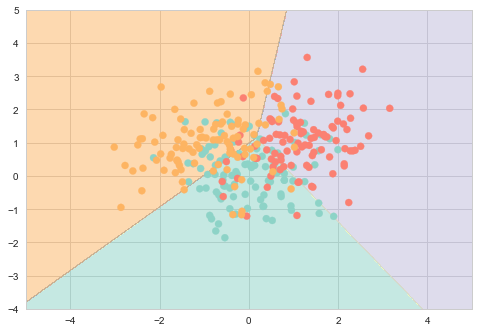

In [15]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show() ## 분류 선은 직선으로 나온다 

In [79]:
## 아이리스 붖꽃데이터
## 1.모델선정 2.confusion matrix 3.Classification report 4. ROC 만들기 

from sklearn.datasets import load_iris
iris = load_iris()
X= pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, dtype="category")
y = sy.cat.rename_categories(iris.target_names)
data1['species'] = y
data1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

model1 = QuadraticDiscriminantAnalysis().fit(X, y)
model2 = LinearDiscriminantAnalysis().fit(X, y)
yhat1 = model1.predict(X)
yhat2 = model2.predict(X)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,yhat1)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [84]:
confusion_matrix(y,yhat2)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])